# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Read the Data

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
# Load data into a dataframe

data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,...,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,...,8/28/2014,9/30/2014,44,23,30,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,7

In [3]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,...,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,9

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
list(data.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

## 1. Data Cleaning

### Handle Missing Data

In [6]:
# Get all the missing columns in a list

cols_with_nulls = list(data.columns[data.isnull().sum()>0])
len(cols_with_nulls)

166

Identify the outgoing/incoming minutes of usage columns and see if the total outgoing/incoming minutes is 0 for those data points. If yes, impute the missing values in all those outgoing/incoming minutes of usage columns as 0.

In [7]:
# Filer the columns that are having og and mou in it.

og_mous = list(filter(lambda x: 'og' in x and 'mou' in x, cols_with_nulls))
print(og_mous)
len(og_mous)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9']

54

In [8]:
data['loc_og_t2o_mou'][data['loc_og_t2o_mou'].isnull()]

201     NaN
202     NaN
232     NaN
275     NaN
279     NaN
         ..
99383   NaN
99496   NaN
99856   NaN
99978   NaN
99993   NaN
Name: loc_og_t2o_mou, Length: 1018, dtype: float64

In [9]:
# data['loc_og_t2o_mou'][data['loc_og_t2o_mou'].isnull()] = data.apply(lambda row: 0 if row['total_og_mou_6']+row['total_og_mou_7']+row['total_og_mou_8']+row['total_og_mou_9'] == 0 else row['loc_og_t2o_mou'], axis=1)
# data['std_og_t2o_mou'][data['std_og_t2o_mou'].isnull()] = data.apply(lambda row: 0 if row['total_og_mou_6']+row['total_og_mou_7']+row['total_og_mou_8']+row['total_og_mou_9'] == 0 else row['std_og_t2o_mou'], axis=1)
# [og_mous.remove(x) for x in ['loc_og_t2o_mou','std_og_t2o_mou']]
# [cols_with_nulls.remove(x) for x in ['loc_og_t2o_mou','std_og_t2o_mou']]

# Check the total of all 4 months minutes of usage where loc_og_t2o_mou and std_og_t2o_mou are NaN. If the total minutes of usage is 0 then replace the missing values for std_og_t2o_mou and loc_og_t2o_mou with 0
tot_sm = data[data['loc_og_t2o_mou'].isnull()][['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_6']].sum()
print('total of all 4 months minutes of usage where loc_og_t2o_mou and std_og_t2o_mou are NaN is \n{0}'.format(tot_sm))

total of all 4 months minutes of usage where loc_og_t2o_mou and std_og_t2o_mou are NaN is 
total_og_mou_6    0.0
total_og_mou_7    0.0
total_og_mou_8    0.0
total_og_mou_6    0.0
dtype: float64


In [10]:
[data[x].fillna(0, inplace=True) for x in ['loc_og_t2o_mou','std_og_t2o_mou']]
[cols_with_nulls.remove(x) for x in ['loc_og_t2o_mou','std_og_t2o_mou']]
[og_mous.remove(x) for x in ['loc_og_t2o_mou','std_og_t2o_mou']]

[None, None]

In [11]:
data[['loc_og_t2o_mou','std_og_t2o_mou']].isnull().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
dtype: int64

In [12]:
temp = og_mous.copy()
for col in og_mous:
    mnth = col.split('_')[-1]
    total_col = 'total_og_mou_'+mnth
    total_sum = int(data[data[col].isnull()][total_col].sum())
    if total_sum == 0:
        print('Filling all null values in column Column {0} with 0 as the total MOU sum for month {1} is {2}'.format(col, mnth, total_sum))
        data[col].fillna(0, inplace=True)
        cols_with_nulls.remove(col)
        temp.remove(col)
og_mous = temp   

Filling all null values in column Column roam_og_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column roam_og_mou_7 with 0 as the total MOU sum for month 7 is 0
Filling all null values in column Column roam_og_mou_8 with 0 as the total MOU sum for month 8 is 0
Filling all null values in column Column roam_og_mou_9 with 0 as the total MOU sum for month 9 is 0
Filling all null values in column Column loc_og_t2t_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column loc_og_t2t_mou_7 with 0 as the total MOU sum for month 7 is 0
Filling all null values in column Column loc_og_t2t_mou_8 with 0 as the total MOU sum for month 8 is 0
Filling all null values in column Column loc_og_t2t_mou_9 with 0 as the total MOU sum for month 9 is 0
Filling all null values in column Column loc_og_t2m_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column loc_og_t2m_mou_7 with 0 as the total MOU sum

In [13]:
# Are there any outgoing mous columns??
len(og_mous)

0

In [14]:
# Remaining null columns
len(cols_with_nulls)

112

In [15]:
# Filer the columns that are having ic and mou in it.

ic_mous = list(filter(lambda x: 'ic' in x and 'mou' in x, cols_with_nulls))
print(ic_mous)
len(ic_mous)

['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9']


49

In [16]:
tot_sm = data[data['loc_ic_t2o_mou'].isnull()][['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9']].sum()
print('Total incoming minutes of usage where the loc_ic_t2o_mou column has null values is \n{0}'.format(tot_sm))

Total incoming minutes of usage where the loc_ic_t2o_mou column has null values is 
total_ic_mou_6    0.0
total_ic_mou_7    0.0
total_ic_mou_8    0.0
total_ic_mou_9    0.0
dtype: float64


Hence fill all null values in loc_ic_t2o_mou with 0

In [17]:
data['loc_ic_t2o_mou'].fillna(0, inplace=True)
cols_with_nulls.remove('loc_ic_t2o_mou')
ic_mous.remove('loc_ic_t2o_mou')

In [18]:
temp = ic_mous.copy()
for col in ic_mous:
    mnth = col.split('_')[-1]
    total_col = 'total_ic_mou_'+mnth
    total_sum = int(data[data[col].isnull()][total_col].sum())
    if total_sum == 0:
        print('Filling all null values in column Column {0} with 0 as the total MOU sum for month {1} is {2}'.format(col, mnth, total_sum))
        data[col].fillna(0, inplace=True)
        cols_with_nulls.remove(col)
        temp.remove(col)
ic_mous = temp   

Filling all null values in column Column roam_ic_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column roam_ic_mou_7 with 0 as the total MOU sum for month 7 is 0
Filling all null values in column Column roam_ic_mou_8 with 0 as the total MOU sum for month 8 is 0
Filling all null values in column Column roam_ic_mou_9 with 0 as the total MOU sum for month 9 is 0
Filling all null values in column Column loc_ic_t2t_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column loc_ic_t2t_mou_7 with 0 as the total MOU sum for month 7 is 0
Filling all null values in column Column loc_ic_t2t_mou_8 with 0 as the total MOU sum for month 8 is 0
Filling all null values in column Column loc_ic_t2t_mou_9 with 0 as the total MOU sum for month 9 is 0
Filling all null values in column Column loc_ic_t2m_mou_6 with 0 as the total MOU sum for month 6 is 0
Filling all null values in column Column loc_ic_t2m_mou_7 with 0 as the total MOU sum

In [19]:
# Are there any incoming mou columns with null values?
len(ic_mous)

0

In [20]:
print(cols_with_nulls)

['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', '

In [21]:
data[data['onnet_mou_6'].isna()]['total_og_mou_6'].value_counts()

0.0    3937
Name: total_og_mou_6, dtype: int64

In [22]:
onnet_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9']
temp = onnet_cols.copy()
for col in onnet_cols:
    mnth = col.split('_')[-1]
    total_og_col = 'total_og_mou_'+mnth
    total_ic_col = 'total_ic_mou_'+mnth
    if data[data[col].isnull()][total_og_col].sum() == 0 and data[data[col].isnull()][total_ic_col].sum() == 0:
        print('Filling all the missing values in column {0} with 0 as the {1} and {2} are having values 0 for the missing data points'.format(col,total_ic_col,total_og_col))
        data[col].fillna(0, inplace=True)
        cols_with_nulls.remove(col)
        temp.remove(col)
onnet_cols = temp

Filling all the missing values in column onnet_mou_6 with 0 as the total_ic_mou_6 and total_og_mou_6 are having values 0 for the missing data points
Filling all the missing values in column onnet_mou_7 with 0 as the total_ic_mou_7 and total_og_mou_7 are having values 0 for the missing data points
Filling all the missing values in column onnet_mou_8 with 0 as the total_ic_mou_8 and total_og_mou_8 are having values 0 for the missing data points
Filling all the missing values in column onnet_mou_9 with 0 as the total_ic_mou_9 and total_og_mou_9 are having values 0 for the missing data points
Filling all the missing values in column offnet_mou_6 with 0 as the total_ic_mou_6 and total_og_mou_6 are having values 0 for the missing data points
Filling all the missing values in column offnet_mou_7 with 0 as the total_ic_mou_7 and total_og_mou_7 are having values 0 for the missing data points
Filling all the missing values in column offnet_mou_8 with 0 as the total_ic_mou_8 and total_og_mou_8 ar

In [23]:
# Are there any more missing values for onnet?
len(onnet_cols)

0

In [24]:
len(cols_with_nulls)

55

In [25]:
print(cols_with_nulls)

['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_us

In [26]:
others_cols = ['og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9']

In [27]:
temp = others_cols.copy()
for col in others_cols:
    mnth = col.split('_')[-1]
    total_og_col = 'total_og_mou_'+mnth
    total_ic_col = 'total_ic_mou_'+mnth
    if data[data[col].isnull()][total_og_col].sum() == 0 and data[data[col].isnull()][total_ic_col].sum() == 0:
        print('Filling all the missing values in column {0} with 0 as the {1} and {2} are having values 0 for the missing data points'.format(col,total_ic_col,total_og_col))
        data[col].fillna(0, inplace=True)
        cols_with_nulls.remove(col)
        temp.remove(col)
others_cols = temp

Filling all the missing values in column og_others_6 with 0 as the total_ic_mou_6 and total_og_mou_6 are having values 0 for the missing data points
Filling all the missing values in column og_others_7 with 0 as the total_ic_mou_7 and total_og_mou_7 are having values 0 for the missing data points
Filling all the missing values in column og_others_8 with 0 as the total_ic_mou_8 and total_og_mou_8 are having values 0 for the missing data points
Filling all the missing values in column og_others_9 with 0 as the total_ic_mou_9 and total_og_mou_9 are having values 0 for the missing data points
Filling all the missing values in column ic_others_6 with 0 as the total_ic_mou_6 and total_og_mou_6 are having values 0 for the missing data points
Filling all the missing values in column ic_others_7 with 0 as the total_ic_mou_7 and total_og_mou_7 are having values 0 for the missing data points
Filling all the missing values in column ic_others_8 with 0 as the total_ic_mou_8 and total_og_mou_8 are h

In [28]:
data[others_cols].isnull().sum()

Series([], dtype: float64)

In [29]:
# Remaining missing values columns
len(cols_with_nulls)

47

In [30]:
print(cols_with_nulls)

['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [31]:
#last_date_of_month_7 8 , 9 
print(data['last_date_of_month_7'].unique()) #Check Unique Value
print(data['last_date_of_month_7'].unique()[0]) # Get the first unique value to replace

print(data['last_date_of_month_8'].unique()) #Check Unique Value
print(data['last_date_of_month_8'].unique()[0]) # Get the first unique value to replace

print(data['last_date_of_month_9'].unique()) #Check Unique Value
print(data['last_date_of_month_9'].unique()[0]) # Get the first unique value to replace

['7/31/2014' nan]
7/31/2014
['8/31/2014' nan]
8/31/2014
['9/30/2014' nan]
9/30/2014


In [32]:
#Replace all null values with the last day as these columns has only 1 unique valeus

# last_date_of_month_7
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].unique()[0])
cols_with_nulls.remove('last_date_of_month_7')
# last_date_of_month_8
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].unique()[0])
cols_with_nulls.remove('last_date_of_month_8')
# last_date_of_month_9
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].unique()[0])
cols_with_nulls.remove('last_date_of_month_9')

In [33]:
# Date Columns

date_cols = [i for i in (data.columns) if 'date' in i and 'last_date_of_month' not in i]
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [34]:
# Replace the dates with number of days compared to the last date of column.
for col in date_cols:
    mnth = col.split('_')[-1]
    last_date_col = 'last_date_of_month_'+mnth
    data[col] = pd.to_datetime(data[last_date_col]) - pd.to_datetime(data[col])
    data[col] = pd.to_numeric(data[col].dt.days,downcast='integer')

In [35]:
# Date columns with missing values

missing_date_cols = [i for i in (data.columns) if 'date' in i and 'last_date_of_month' not in i]
missing_date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [36]:
# Impute 0 with missing values in date columns of last_rech where the total_rech_num is 0
temp = missing_date_cols.copy()
for col in missing_date_cols:
    mnth = col.split('_')[-1]
    total_col = 'total_rech_num_'+mnth if 'rech_data' not in col else 'total_rech_data_'+mnth
    if int(data[data[col].isnull()][total_col].sum()) == 0:
        print('Replacing missing values with 0 for column {0} as sum of {1} is 0'.format(col, total_col))
        data[col].fillna(0, inplace=True)
        temp.remove(col)
        cols_with_nulls.remove(col)
missing_date_cols = temp

Replacing missing values with 0 for column date_of_last_rech_6 as sum of total_rech_num_6 is 0
Replacing missing values with 0 for column date_of_last_rech_7 as sum of total_rech_num_7 is 0
Replacing missing values with 0 for column date_of_last_rech_8 as sum of total_rech_num_8 is 0
Replacing missing values with 0 for column date_of_last_rech_9 as sum of total_rech_num_9 is 0
Replacing missing values with 0 for column date_of_last_rech_data_6 as sum of total_rech_data_6 is 0
Replacing missing values with 0 for column date_of_last_rech_data_7 as sum of total_rech_data_7 is 0
Replacing missing values with 0 for column date_of_last_rech_data_8 as sum of total_rech_data_8 is 0
Replacing missing values with 0 for column date_of_last_rech_data_9 as sum of total_rech_data_9 is 0


In [37]:
print(len(cols_with_nulls))

36


In [38]:
print(cols_with_nulls)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [39]:
#fill all remaining null values with zero

for i in cols_with_nulls:
    data[i] = data[i].fillna(value = 0)

In [40]:
#Check Null value in complete orignal dataframe

percent=round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False).round(2)
percent_High = percent[percent > 0]
percent_High

Series([], dtype: float64)

Drop the columns Last Date of Month as they are no more significant.

We have individual data per months and we have used them to fill the nan values. Hence they can be removed.

In [41]:
data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

In [42]:
#  Shape of DataFrame

data.shape

(99999, 222)

### High Value Customers

Calculate the avg recharge amount for months 6 and 7 and then filter the rows that are having more than 70th percentile of the avg rech amount for months 6 and 7

In [43]:
data['avg_rech_amt_6n7'] = (data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [44]:
avg_rech_70_per = data['avg_rech_amt_6n7'].quantile(0.7)
avg_rech_70_per

368.5

In [45]:
data = data[data['avg_rech_amt_6n7']>=avg_rech_70_per]

In [46]:
#Dropping the average column
data.drop('avg_rech_amt_6n7',axis=1,inplace=True)

In [47]:
data.shape

(30011, 222)

In [48]:
data.shape

(30011, 222)

## Derive Churn

Churn value will be 1 if total_ic_mou_9 and total_og_mou_9 are equal to 0 and recharge amount for 2g and 3g are also equal to 0.
Else the churn value is 0

In [49]:
data['churn'] = data.apply(lambda row: 1 if row['total_og_mou_9'] == 0 and row['total_ic_mou_9'] == 0 and row['count_rech_2g_9'] == 0 and row['count_rech_3g_9'] == 0 else 0, axis=1)

In [50]:
data['churn'].value_counts(normalize=True)*100

0    91.496451
1     8.503549
Name: churn, dtype: float64

In [51]:
# Let us remove all variables of 9th month.
for col in data.columns:
    '_9' in col and data.drop(col,axis=1,inplace=True)

In [52]:
data.shape

(30011, 170)

## Data Preparation

Since 6th and 7th month are good phases let us combine the data for these two months and keep 8th month data as it is

In [53]:
for col in data.columns:
    if '_6' in col:
        col_7 = col.replace('_6','_7')
        new_col_name = col.replace('_6','_good')
        data[new_col_name] = (data[col]+data[col_7])/2
        data.drop([col,col_7],axis=1,inplace=True)
data['vbc_3g_good'] = data['jun_vbc_3g']+data['jul_vbc_3g']
data.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)

In [54]:
# Let us remove all the columns that have high class imbalance
for col in data.columns:
    if 'churn' not in col:
        valu_counts = data[col].value_counts(normalize=True)*100
        bal_arr = [i for i in list(valu_counts.values) if i > 90]
        if len(bal_arr) > 0:
            data.drop(col, inplace=True, axis=1)

In [55]:
data.shape

(30011, 100)

In [56]:
print(list(data.columns))

['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'churn', 'arpu_good', 'onnet_mou_good', 'offnet_mou_good', 'roam_ic_mou_good', 'roam_og_mou_good', 'loc_og_t2t_mou_good', 'loc_og_t2

In [57]:
data.describe()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,fb_user_8,aon,aug_vbc_3g,churn,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,date_of_last_rech_good,last_day_rch_amt_good,date_of_last_rech_data_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,fb_user_good,vbc_3g_good
count,3.001100e+04,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,534.857433,267.600412,375.021691,13.25627,21.469272,87.139995,167.591199,6.494314,1.712739,261.233938,172.196408,179.568790,1.789728,353.558826,6.885193,623.774684,65.936968,153.628517,14.706512,234.281577,15.051559,30.434765,2.680925,48.170990,295.426531,11.700835,1.237756,10.225317,613.638799,162.869348,4.009530,95.653294,4.318050,1.035287,55.258072,0.721669,0.313618,89.762766,69.209105,269.864111,52.128978,47.836122,0.114058,0.607611,0.173203,0.327946,1264.064776,129.439626,0.085035,588.209915,300.188833,420.928874,15.467439,25.678826,95.205213,181.275554,7.038299,1.714694,283.527953,194.815319,208.254840,2.022503,405.096991,2.235913,6.670925,0.370053,697.911136,69.530203,160.213421,16.052826,245.806370,16.561536,32.746156,2.933727,52.245426,311.193772,0.042399,11.758360,1.332846,12.017394,696.664356,173.537553,3.325114,104.886392,4.053314,0.995468,57.794475,0.671887,0.323581,94.136915,78.515195,268.243209,54.942466,51.042223,0.128103,0.543784,0.179518,0.343324,256.487651
std,6.846405e+05,492.259586,466.560947,477.489377,74.55207,106.244774,23

Removing the total minutes of usage columns as we have the individual minutes for various types of calls

In [58]:
for col in data.columns:
    'total' in col and 'mou' in col and data.drop(col, axis=1, inplace=True)
data.shape

(30011, 96)

## EDA

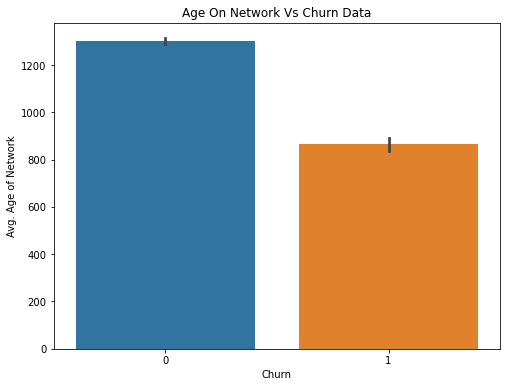

In [59]:
# AON(Age on network) - number of days the customer is using the operator T network
plt.figure(figsize=(8,6))
plt.title("Age On Network Vs Churn Data")
sns.barplot(x = 'churn', y = 'aon', data = data)
plt.ylabel('Avg. Age of Network')
plt.xlabel('Churn')
plt.show()

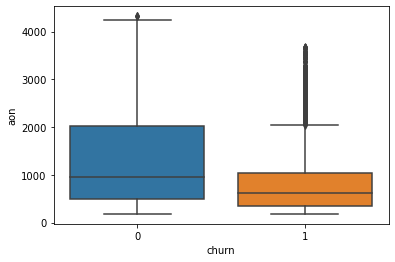

In [60]:
sns.boxplot(y = 'aon', x = 'churn', data = data)
plt.show()

In [61]:
print("Churned = ", data.loc[data.churn == 1, 'aon'].mean())
print("Not Churned = ", data.loc[data.churn == 0, 'aon'].mean())

Churned =  864.532131661442
Not Churned =  1301.1967660876217


#### Insight
##### Age of Avg churned user is 864 days on avg.

Churned =  720.9796238244514
Not Churned =  694.4045303907644


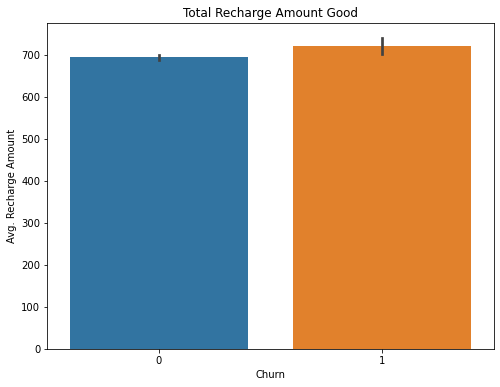

In [62]:
# Total Recharge Amount
# Good Phase
#The graph needs to be corrected to make it half

plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount Good")
sns.barplot(x = 'churn', y = 'total_rech_amt_good', data = data)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
a=data.loc[data.churn == 1, 'total_rech_amt_good'].mean()
b=data.loc[data.churn == 0, 'total_rech_amt_good'].mean()
print("Churned = ",a ) #Doing bacause it is sum of 2 columns
print("Not Churned = ", b) # #Doing bacause it is sum of 2 columns

Churned =  255.63636363636363
Not Churned =  646.9110309916603


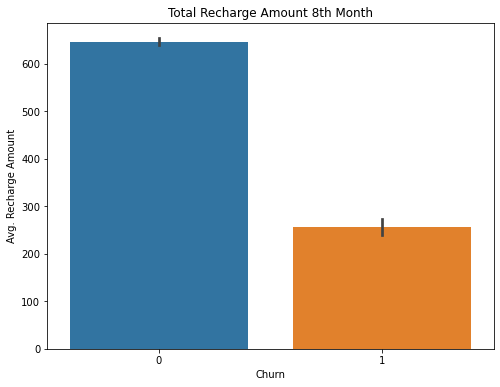

In [63]:
# Total Recharge Amount
# Test Phase

plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount 8th Month")
sns.barplot(x = 'churn', y = 'total_rech_amt_8', data = data)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", data.loc[data.churn == 1, 'total_rech_amt_8'].mean())
print("Not Churned = ", data.loc[data.churn == 0, 'total_rech_amt_8'].mean())

#### Insight
##### Churned customer Avg expense was 720 in Good Months( June & July) even higher than non churned customer.
##### Churned customer Avg expense dipped to around 250 in test month Aug could be consider as a deciding factor in churn analysis

Text(0.5, 0, 'Churn')

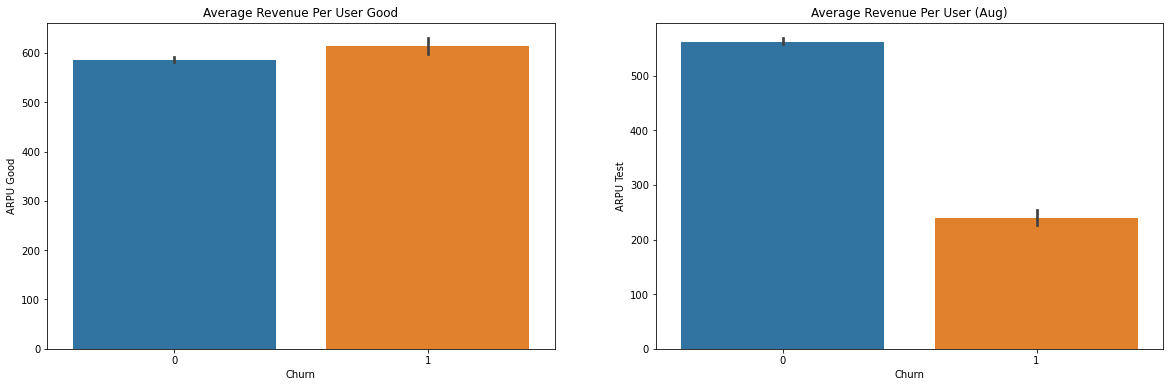

In [64]:
# ARPU - Average Revenue Per User

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
# Good Month
plt.title("Average Revenue Per User Good")
sns.barplot(x = 'churn', y = 'arpu_good', data = data)
plt.ylabel('ARPU Good')
plt.xlabel('Churn')

plt.subplot(1,2,2)
# July
plt.title("Average Revenue Per User (Aug)")
sns.barplot(x = 'churn', y = 'arpu_8', data = data)
plt.ylabel('ARPU Test')
plt.xlabel('Churn')

In [65]:
print(data.skew())

mobile_number                  -0.025494
arpu_8                         16.088476
onnet_mou_8                     4.800149
offnet_mou_8                    4.994792
roam_ic_mou_8                  18.428527
roam_og_mou_8                  14.041460
loc_og_t2t_mou_8               13.383379
loc_og_t2m_mou_8                3.920363
loc_og_t2f_mou_8               11.700209
loc_og_t2c_mou_8               16.352413
loc_og_mou_8                    5.182940
std_og_t2t_mou_8                4.885517
std_og_t2m_mou_8                6.903166
std_og_t2f_mou_8               16.811454
std_og_mou_8                    3.921274
spl_og_mou_8                   18.836230
loc_ic_t2t_mou_8               10.276835
loc_ic_t2m_mou_8                5.311512
loc_ic_t2f_mou_8               10.780583
loc_ic_mou_8                    4.062445
std_ic_t2t_mou_8               23.125811
std_ic_t2m_mou_8               16.958324
std_ic_t2f_mou_8               34.226516
std_ic_mou_8                   12.622002
isd_ic_mou_8    

In [66]:
#As we can see above except Mobile number all the columns are highly left skewed
#In next step will set Mobile numbers as index and then will do data scaling using 
data.set_index('mobile_number', inplace = True)
data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,fb_user_8,aon,aug_vbc_3g,churn,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,date_of_last_rech_good,last_day_rch_amt_good,date_of_last_rech_data_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,fb_user_good,vbc_3g_good
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,6.50,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,31.59,15.14,7,3638,1580,5.0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,1185.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,38.12
7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,10.23,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,0.00,0.00,14,120,30,1.0,10,8.0,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0,3,0,1.0,315,21.03,0,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,0.000,0.000,0.000,20.0,519.0,122.0,2.5,25.0,0.0,1.0,77.0,1.0,0.0,88.5,178.0,375.475,0.0,0.0,0.5,0.5,0.0,0.5,1032.81
7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,4.78,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,393.39,21.44,11,717,130,1.0,0,1.0,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0,3,0,1.0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,0.225,153.695,49.860,5.0,380.0,110.0,9.5,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00
7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,5.91,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,0.23,0.00,2,160,130,17.0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,0.000,0.000,0.000,8.0,459.0,110.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.34
7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,30,30,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0,0.0,667,0.00,0,354.4940,597.595,30.820,2.38

### Outlier Treatment

In [67]:
# Capping and flooring the values with lower and upper limits
outlier_cols = list(data.columns)
outlier_cols.remove('churn')
outlier_cols
for col in outlier_cols:
    q25,q75 = data[col].quantile(0.25), data[col].quantile(0.75)
    iqr = q75-q25
    cut_off = iqr*1.5
    lower_limit = q25-cut_off
    upper_limit = q75+cut_off
    data[data[col]<lower_limit][col] = lower_limit
    data[data[col]>upper_limit][col] = upper_limit    

We can see good skewness for the data and hence all the columns would be normally distributed now.

### Train Test Split

In [68]:
y = data['churn']
X = data.drop('churn', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [70]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21007, 94), (21007,), (9004, 94), (9004,))

In [71]:
# Scale the data using StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [72]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,fb_user_8,aon,aug_vbc_3g,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,date_of_last_rech_good,last_day_rch_amt_good,date_of_last_rech_data_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,fb_user_good,vbc_3g_good
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000476032,-0.318969,0.320115,-0.594406,-0.173141,-0.209478,-0.324009,-0.702254,-0.317205,-0.250817,-0.672215,0.573021,-0.219200,-0.152592,0.234851,-0.170889,-0.405483,-0.684197,-0.326399,-0.735412,0.626536,0.706536,-0.127334,0.836532,-0.152432,-0.095158,1.539738,-0.293746,-0.648201,-0.787061,-0.580228,-0.562143,-0.421416,-0.529666,-0.381463,-0.261239,-0.485476,-0.256739,-0.313554,-0.323095,-0.332171,-0.316581,-0.326445,-0.301673,-0.70005,-0.938635,-0.329669,-0.483464,0.338847,-0.692308,-0.223986,-0.276748,-0.403063,-0.774043,-0.315492,0.464540,-0.775970,0.646950,-0.288568,-0.171393,0.235302,-0.048931,0.690664,-0.182643,-0.420725,-0.686658,-0.353784,-0.750801,0.665377,0.194897,-0.153920,0.495469,0.187077,-0.169738,-0.092325,1.084775,-0.520352,-0.795370,-0.840079,-0.819916,0.149638,-0.229862,-0.498204,-0.099262,-0.309188,-0.489026,0.108450,-0.344023,-0.356261,-0.368305,-0.378822,-0.023934,-0.335285,0.357111,-0.349741
7002362029,-0.120157,-0.289889,-0.427118,-0.173141,-0.209478,0.176982,-0.245363,2.358703,-0.250817,0.090058,-0.413920,-0.424752,-0.152592,-0.565942,-0.144825,-0.180107,0.413628,3.383682,0.688366,-0.201283,-0.282082,-0.107896,-0.331117,-0.008639,-0.095158,-0.758758,-0.279568,0.196411,1.380375,0.697039,0.872358,-0.019149,1.356275,0.143111,-0.261239,0.574907,-0.068182,-0.043227,-0.323095,-0.332171,2.468349,-0.326445,-0.301673,1.42847,-0.198224,0.104407,-0.460861,-0.528804,-0.565442,-0.223986,-0.276748,-0.115131,-0.184697,0.869507,-0.272993,-0.138527,-0.500631,-0.522491,-0.171393,-0.701347,-0.048931,-0.115092,-0.182643,-0.349593,0.925564,1.105793,0.637095,-0.169392,-0.345314,-0.127847,-0.354399,-0.253541,-0.021892,-0.092325,-0.689027,-0.514834,-0.131225,1.236469,0.039159,-0.094033,-0.229862,0.412387,-0.099262,-0.309188,0.028229,-0.295808,-0.285546,0.119869,-0.218895,1.097600,-0.324100,-0.335285,0.357111,-0.192425
7002395145,0.054303,-0.386256,0.074520,-0.173141,-0.209478,-0.012372,1.015754,-0.241827,-0.250817,0.620574,-0.413920,-0.423849,-0.152592,-0.565336,-0.298169,-0.145997,0.104772,-0.298109,-0.044037,-0.201283,-0.282082,-0.127334,-0.333863,7.100669,-0.095158,0.494967,0.055400,-0.648201,-0.590021,-0.308469,-0.562143,-0.421416,-0.529666,-0.381463,-0.261239,-0.485476,-0.256739,-0.313554,-0.323095,-0.332171,-0.316581,-0.326445,-0.301673,-0.70005,1.036820,-0.329669,-0.112356,-0.560726,-0.107316,-0.223986,-0.276748

In [73]:
#Transform Scaler at Test data
abc=X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test))


In [74]:
X_test.columns = abc

In [75]:
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,fb_user_8,aon,aug_vbc_3g,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,date_of_last_rech_good,last_day_rch_amt_good,date_of_last_rech_data_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,fb_user_good,vbc_3g_good
0,-1.139187,-0.556345,-0.766101,-0.173141,-0.209478,-0.351696,-0.704065,-0.317205,-0.250817,-0.691355,-0.410952,-0.416604,-0.152592,-0.558478,-0.183921,-0.280622,-0.018042,-0.096315,-0.170000,-0.127570,0.131649,-0.127334,0.014757,-0.152432,-0.095158,-1.072189,-1.091289,-0.933542,-0.787061,-0.648167,-0.562143,-0.421416,-0.529666,-0.381463,-0.261239,-0.485476,-0.256739,-0.313554,-0.323095,-0.332171,-0.316581,-0.326445,-0.301673,-0.70005,-0.744060,-0.329669,0.019422,-0.621922,1.830552,-0.223986,-0.276748,-0.343447,-0.388623,-0.196658,-0.199728,-0.482609,-0.470190,2.341437,-0.171393,1.289881,-0.048931,-0.151813,0.813915,-0.044425,0.031045,-0.045080,-0.007736,-0.212260,0.151603,-0.153920,-0.037889,-0.253541,-0.169738,-0.092325,0.855897,-0.032602,-0.380279,-0.098455,-0.789849,-0.662600,-0.464185,-0.583729,-0.394406,-0.309188,-0.537608,-0.313489,-0.344023,-0.356261,-0.368521,-0.378822,-0.324100,-0.335285,-0.783158,-0.349741
1,-0.765875,-0.022539,-0.629270,-0.158974,-0.168135,-0.206307,-0.701328,-0.317205,-0.250817,-0.595016,0.106719,-0.295026,-0.152592,-0.129207,0.315641,-0.415810,-0.698253,-0.326399,-0.750601,-0.167741,-0.182516,-0.127334,-0.241799,-0.152432,-0.095158,-0.654281,-0.529464,0.493166,0.198137,1.050325,-0.562143,-0.421416,-0.529666,-0.381463,-0.261239,-0.485476,-0.256739,-0.313554,-0.323095,-0.332171,-0.316581,-0.326445,-0.301673,-0.70005,-0.444003,-0.329669,0.209452,2.126457,-0.062156,-0.220413,-0.271429,-0.230951,-0.716763,-0.315492,-0.121579,-0.628568,2.557090,0.374373,-0.169234,1.982598,-0.048931,0.806639,-0.182643,-0.263069,-0.606874,-0.353784,-0.614032,1.071339,0.869390,-0.097783,1.204049,-0.253541,-0.147330,-0.092325,-0.574588,0.115267,0.156146,0.643169,-0.179905,-0.256481,-0.229862,-0.457956,-0.099262,-0.309188,-0.466164,-0.068556,-0.344023,-0.356261,-0.341828,-0.378822,-0.023934,-0.335285,0.357111,-0.349741
2,0.145127,-0.554367,-0.703924,-0.173141,-0.209478,-0.342699,-0.597035,0.098822,-0.250817,-0.594910,-0.413920,-0.424752,-0.152592,-0.565942,-0.298169,-0.358793,0.105637,-0.248379,-0.144993,-0.201283,-0.282082,-0.127334,-0.333863,-0.152432,-0.095158,-0.445327,0.071351,0.504580,0.001097,1.063913,-0.040506,0.383117,1.870622,-0.381463,1.369381,2.213680,-0.241386,1.021611,1.350335,1.118392,-0.316581,-0.326445,3.099050,1.42847,1.879640,0.541315,-0.505973,-0.678301,-0.899101,-0.223986,-0.276748,-0.399176,-0.709422,-0.118847,-0.272993,-0.719701,-0.500631,-0.522491,-0.171393,-0.701347,-0.048931,-0.352327,-0.182643,-0.4

# Model Preperation

### Now we need to perform below mentioned steps

1: Create 1 model without PCA- This will be called interpretable model

2: Create 3 diffrent models with PCA - These will be called High Performance Model

3: In both above cases , hyperparameter tunning is required

4: In both above cases , Balance the Data

5: Evaluate all (4) models

6: Explain your interpretable model and recommendation for the company

### Data Balancing

In [76]:
#Balance the data
#Check churn ratio before balancing using smote
print('Churn % before balancing')
(100 * y_train.value_counts()/ y_train.shape[0]).round(2)

Churn % before balancing


0    91.47
1     8.53
Name: churn, dtype: float64

In [77]:
#At this moment the churn ratio is highly imbalance which is going to influence the final decision in test set
#To overcome this situation , we will use SMOTE balancing technique only on train data
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [78]:
print('Churn % before balancing')
(100 * y_smote.value_counts()/ y_smote.shape[0]).round(2)

Churn % before balancing


1    50.0
0    50.0
Name: churn, dtype: float64

In [79]:
pd.Series(y_smote).value_counts()

1    19215
0    19215
Name: churn, dtype: int64

In [80]:
# We can see now that data is uniformly distributed
# Number of Rows increased from around 30k to 38k
# Now we will change the value X_train and y_train

X_train = X_smote.copy()
y_train = y_smote.copy()
pd.Series(y_train).value_counts()

1    19215
0    19215
Name: churn, dtype: int64

In [81]:
X_train.corr()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,fb_user_8,aon,aug_vbc_3g,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,date_of_last_rech_good,last_day_rch_amt_good,date_of_last_rech_data_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,fb_user_good,vbc_3g_good
arpu_8,1.000000,0.419428,0.573486,0.148883,0.237515,0.217469,4.091334e-01,0.199079,0.121931,0.404963,0.341385,0.356120,0.089310,0.465584,0.167597,0.188927,0.304936,0.136945,0.321524,0.127095,0.148703,0.065535,0.185327,0.104941,0.040663,0.484030,0.958275,0.543326,-0.186034,0.421797,0.178848,0.190805,0.292161,0.105356,0.225244,0.329476,0.103870,0.268576,0.325899,0.307157,0.123243,0.084444,0.285623,0.279148,0.143970,0.238915,0.575907,0.121387,0.183926,0.104638,0.117670,0.113819,0.217391,0.138828,0.039547,0.222138,0.069703,0.037339,0.073913,0.076308,0.289489,0.116208,0.025150,0.076360,0.141141,0.087417,0.147717,0.044213,0.042043,0.060853,0.062291,0.011618,0.075488,0.021028,0.092540,0.594638,0.311714,-0.170113,0.271023,0.092986,0.064751,0.163400,0.020139,0.095248,0.170604,0.033855,0.157507,0.176955,0.161711,0.066214,8.607526e-03,0.157271,0.124177,0.164183
onnet_mou_8,0.419428,1.000000,0.144420,0.015695,0.078875,0.441906,8.964065e-02,0.011812,0.114122,0.327155,0.888261,0.112630,-0.005264,0.684540,0.178010,0.137485,0.061022,0.022058,0.111180,0.145820,0.038931,0.008033,0.102986,0.002894,0.011960,0.380872,0.415083,0.127365,-0.141650,0.102301,0.028828,0.027167,-0.023390,0.032947,0.003914,-0.013242,0.002569,-0.005659,-0.015097,-0.013520,-0.010483,0.035588,-0.018940,0.005823,0.009094,-0.012952,0.198684,0.634459,-0.022335,0.003102,0.033948,0.286905,0.001113,-0.022359,0.045053,0.177718,0.539606,-0.021873,-0.019105,0.357216,-0.017809,0.064549,0.001815,0.056633,-0.026800,-0.008290,0.008384,0.072300,-0.015892,-0.005025,0.030910,0.025502,-0.026371,-0.003218,0.137435,0.203996,-0.018858,-0.183576,0.016525,-0.042087,-0.032637,-0.074345,-0.019561,-0.033576,-0.071927,-0.035712,-0.042024,-0.062728,-0.064071,-0.036644,-1.332895e-02,-0.057226,-0.077545,-0.044016
offnet_mou_8,0.573486,0.144420,1.000000,0.050090,0.125210,0.127225,5.037312e-01,0.137820,0.108818,0.407442,0.095355,0.852690,0.069173,0.614763,0.161651,0.110834,0.281387,0.094411,0.262137,0.057381,0.188009,0.035261,0.176853,0.040882,0.036896,0.391474,0.565610,0.241169,-0.172539,0.197562,0.078904,0.046970,0.035195,0.048148,0.020600,0.035896,0.020172,0.016602,0.026167,0.020365,0.034599,0.042659,0.026522,0.069520,0.067029,0.033013,0.270817,-0.037668,0.527459,0.035286,0.049968,0.053294,0.303269,0.085543,0.046709,0.236695,-0.062845,0.392667,0.044174,0.240327,0.055588,0.072994,0.012692,0.028862,0.143468,0.052549,0.121109,0.006865,0.083816,0.030341,0.066317,0.007285,0.001416,0.014032,0.102604,0.280880,

In [82]:
#Drop some variable where Correlation is higher than 0.9
#Abvoe data extracted in excel and found these variables.
#This will lightup some model performance time in further steps
X_test = X_test.drop(['arpu_8','total_rech_amt_8','count_rech_2g_8','arpu_3g_8','arpu_2g_8',
                      'sachet_2g_8','arpu_good','total_rech_amt_good','count_rech_2g_good',
                      'arpu_3g_good','arpu_2g_good','sachet_2g_good'], 1)
X_train = X_train.drop(['arpu_8','total_rech_amt_8','count_rech_2g_8','arpu_3g_8','arpu_2g_8',
                      'sachet_2g_8','arpu_good','total_rech_amt_good','count_rech_2g_good',
                      'arpu_3g_good','arpu_2g_good','sachet_2g_good'], 1)

In [83]:
print(X_train.shape)
print(X_test.shape)


(38430, 82)
(9004, 82)


## High Performance Models with PCA

#### We will proceed with 3 high performance models Random Forest, Logistic Regression and Gradient Boost

#### To handle Class Imbalance in the models:
- We use the class-weight method for Logistic Regression and Random Forest. 
- For Gradient Boost we use the SMOTE method because there is no class_weight parameter for the same

### Perform PCA

In [84]:
# Train and Test Split
y = data['churn']
X = data.drop('churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

# Scale the data using StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

# Apply Transformation on the test set
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [85]:
pca = IncrementalPCA()
pca.fit(X_train)

IncrementalPCA()

In [86]:
pca.components_

array([[ 8.85726238e-02, -3.48617171e-02, -1.18909065e-02, ...,
         2.02140866e-01,  1.95765911e-01,  1.83416344e-01],
       [ 2.40597554e-01,  1.45248848e-01,  2.20943656e-01, ...,
        -2.55818614e-02, -6.72734919e-02, -1.92909825e-02],
       [ 1.40251014e-01,  1.67742084e-01,  1.17969237e-01, ...,
         3.07627346e-02, -8.38103857e-03,  1.05353415e-02],
       ...,
       [-0.00000000e+00, -7.97452382e-15, -9.14435787e-15, ...,
         1.61329283e-15,  8.44810333e-16, -1.87350135e-16],
       [-0.00000000e+00, -1.92424202e-15,  1.08162160e-14, ...,
        -8.22258928e-16, -3.86843335e-16,  2.88831459e-16],
       [ 0.00000000e+00, -9.85518091e-15,  3.28342135e-15, ...,
         1.72171305e-15, -7.79758202e-16, -1.79890824e-15]])

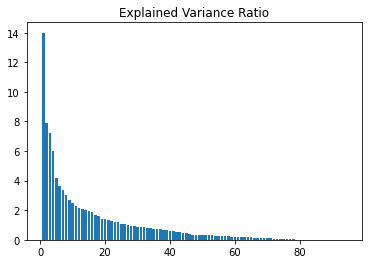

In [87]:
# PLot the explained variance ratio

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
plt.title('Explained Variance Ratio')
plt.show()

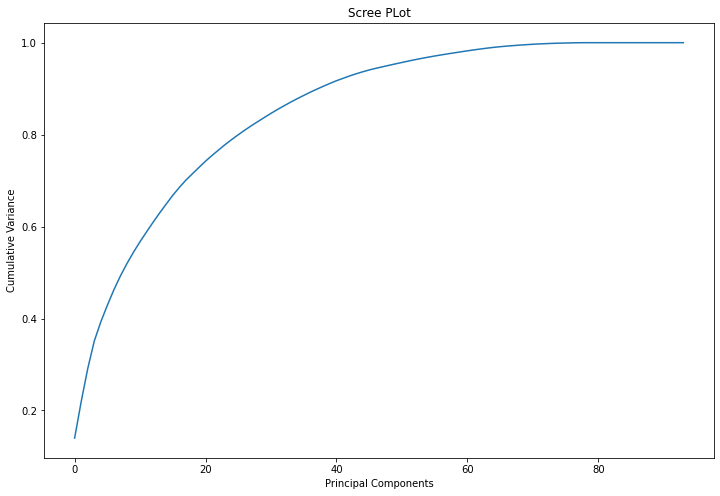

In [88]:
# Scree Plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12,8))
plt.plot(var_cumu)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree PLot')
plt.show()

In [89]:
# Let us see explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      14.00
1      21.90
2      29.09
3      35.10
4      39.28
5      42.88
6      46.26
7      49.28
8      51.98
9      54.45
10     56.73
11     58.87
12     60.97
13     62.99
14     64.92
15     66.81
16     68.52
17     70.11
18     71.49
19     72.87
20     74.23
21     75.48
22     76.67
23     77.85
24     78.94
25     79.98
26     80.98
27     81.93
28     82.85
29     83.74
30     84.63
31     85.47
32     86.28
33     87.06
34     87.82
35     88.53
36     89.23
37     89.89
38     90.52
39     91.13
40     91.72
41     92.24
42     92.76
43     93.23
44     93.66
45     94.07
46     94.41
47     94.74
48     95.07
49     95.39
50     95.70
51     96.00
52     96.30
53     96.58
54     96.85
55     97.10
56     97.34
57     97.57
58     97.79
59     98.01
60     98.23
61     98.43
62     98.63
63     98.81
64     98.98
65     99.13
66     99.25
67     99.36
68     99.47
69     99.57
70     99.66
71     99.73
72     99.79
73     99.85
74     99.89
75     99.93
76     99.97

~ 40 components gives us 91% variance and ~50 components gives us 95% variance.
We will go with n_components as 50

In [90]:
# Create 50 principal components
pca_final = IncrementalPCA(n_components=50)

X_train_pca = pca_final.fit_transform(X_train)

In [91]:
X_train_pca.shape

(21007, 50)

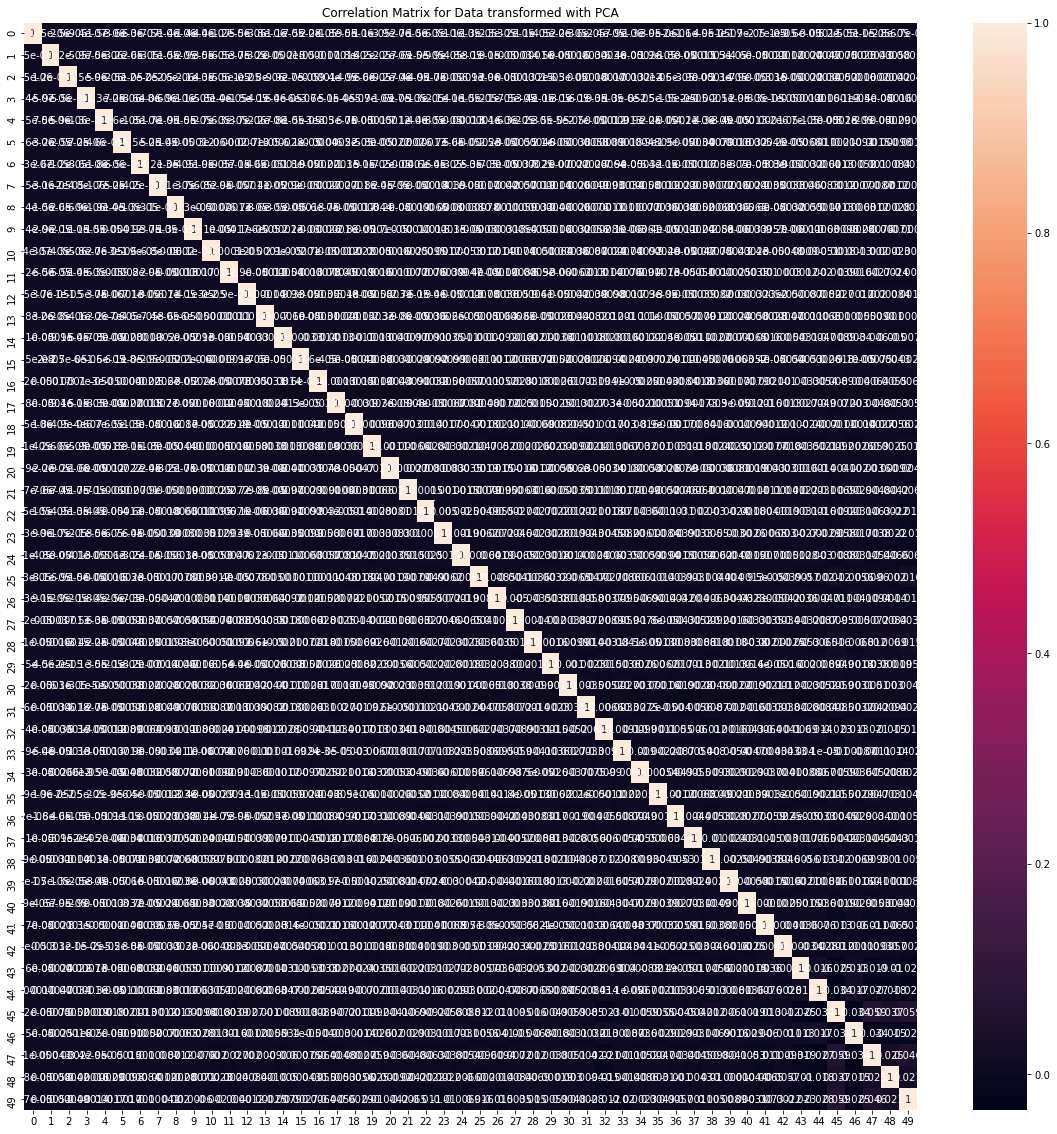

In [92]:
# Plot the correlation matrix after PCA
cormat = np.corrcoef(X_train_pca.transpose())

plt.figure(figsize=(20,20))
sns.heatmap(cormat, annot=True)
plt.title('Correlation Matrix for Data transformed with PCA')
plt.show()

We can see that there is no correlation between any components

In [93]:
# Apply PCA Transformation on the Test Set
X_test_pca = pca_final.transform(X_test)

In [94]:
X_test_pca.shape

(9004, 50)

### 1. Random Forest Classifier

In [95]:
rf = RandomForestClassifier(n_jobs=-1, verbose=1, oob_score=True, class_weight='balanced')

In [96]:
#Hyper parameter tuning of the model with GridSearchCV
params={
    'max_depth':[10,20,40],
    'min_samples_leaf':[5,10,20,50,100,200],
    'min_samples_split': [20,50,100,200],
    'max_features':[0.4,'auto']
}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=folds, n_jobs=-1, verbose=1, scoring='recall')

In [97]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 71.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Wall time: 1h 11min 19s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'max_features': [0.4, 'auto'],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'min_samples_split': [20, 50, 100, 200]},
             scoring='recall', verbose=1)

In [98]:
# Best Estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=0.4,
                       min_samples_leaf=200, min_samples_split=100, n_jobs=-1,
                       oob_score=True, verbose=1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


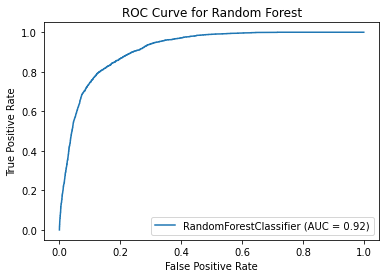

In [99]:
# Plot ROC

metrics.plot_roc_curve(rf_best,X_train_pca, y_train)
plt.title('ROC Curve for Random Forest')
plt.show()

In [100]:
# Print classification Report
print(metrics.classification_report(y_test, rf_best.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8244
           1       0.33      0.80      0.46       760

    accuracy                           0.84      9004
   macro avg       0.65      0.82      0.69      9004
weighted avg       0.92      0.84      0.87      9004



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [101]:
# Create function evaluate model
def evaluate_model(model):
    print("Train Accuracy :", metrics.accuracy_score(y_train, model.predict(X_train_pca)))
    print("Train Confusion Matrix:")
    print(metrics.confusion_matrix(y_train, model.predict(X_train_pca)))
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, model.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, model.predict(X_test_pca)))
    print('Sensitivity')
    print(metrics.recall_score(y_test,model.predict(X_test_pca)))

In [102]:
# Evaluate Model

evaluate_model(rf_best)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Train Accuracy : 0.8490027133812539
Train Confusion Matrix:
[[16372  2843]
 [  329  1463]]
--------------------------------------------------


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Test Accuracy : 0.8431808085295425
Test Confusion Matrix:
[[6983 1261]
 [ 151  609]]
Sensitivity


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8013157894736842


In [103]:
# Tune the parameters and create second version of RandomForest model
rf_2 = RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=0.4,
                       min_samples_leaf=240, min_samples_split=130, n_jobs=-1,
                       oob_score=True, verbose=1)

In [104]:
%%time
rf_2.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


Wall time: 9.66 s


RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=0.4,
                       min_samples_leaf=240, min_samples_split=130, n_jobs=-1,
                       oob_score=True, verbose=1)

In [105]:
# Evaluate Model

evaluate_model(rf_2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Train Accuracy : 0.8478602370638358
Train Confusion Matrix:


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[[16344  2871]
 [  325  1467]]
--------------------------------------------------
Test Accuracy : 0.8412927587738783
Test Confusion Matrix:


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[[6963 1281]
 [ 148  612]]
Sensitivity
0.8052631578947368


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


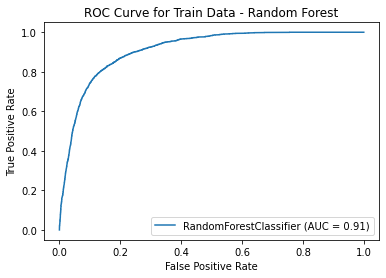

In [106]:
# PLot ROC Curve on Train Data
metrics.plot_roc_curve(rf_2,X_train_pca, y_train)
plt.title('ROC Curve for Train Data - Random Forest')
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


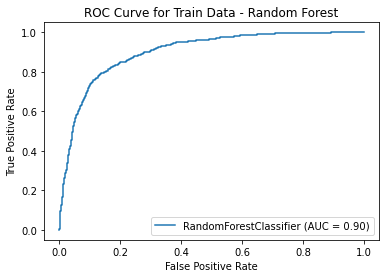

In [107]:
# PLot ROC Curve on Train Data
metrics.plot_roc_curve(rf_2,X_test_pca, y_test)
plt.title('ROC Curve for Train Data - Random Forest')
plt.show()

With RandomForest model we were able to achieve:
- ~81% sensitivity with test data.
- Area Under Curve: 0.91 on Train set and 0.90 on Test set

### 2. Logistic Regression with GridSearch

In [108]:
# Test data
X_test_pca.shape

(9004, 50)

In [109]:
# Hyper parameter tuning for Logistic Regression
lr = LogisticRegression(class_weight='balanced')

params = {
    'C': [0.1, 0.2,0.5,0.8,1], 'penalty': ['l1', 'l2']
}
lr_grid_search = GridSearchCV(estimator=lr, cv=5, param_grid=params,scoring='recall', n_jobs=-1, verbose=1)

In [110]:
%%time
lr_grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Wall time: 2.7 s


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 0.8, 1], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [111]:
lr_pca_best = lr_grid_search.best_estimator_
lr_pca_best

LogisticRegression(C=0.1, class_weight='balanced')

In [112]:
# Sensitivity on Test Data
metrics.recall_score(y_test, lr_pca_best.predict(X_test_pca))

0.8565789473684211

In [113]:
# Evaluate Model
evaluate_model(lr_pca_best)

Train Accuracy : 0.8232017898795639
Train Confusion Matrix:
[[15774  3441]
 [  273  1519]]
--------------------------------------------------
Test Accuracy : 0.8220790759662372
Test Confusion Matrix:
[[6751 1493]
 [ 109  651]]
Sensitivity
0.8565789473684211


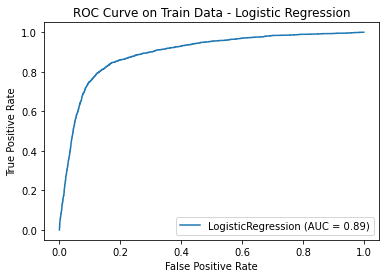

In [114]:
# Plot ROC Curve for Train Data
metrics.plot_roc_curve(lr_pca_best, X_train_pca, y_train)
plt.title('ROC Curve on Train Data - Logistic Regression')
plt.show()

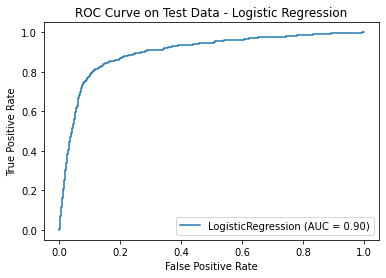

In [115]:
# Plot ROC Curve for Test Data
metrics.plot_roc_curve(lr_pca_best, X_test_pca, y_test)
plt.title('ROC Curve on Test Data - Logistic Regression')
plt.show()

With Logistic Regression model we were able to achieve:
- Sensitivity on test data: ~86%
- Area Under Curve: 0.89 on Train Set and 0.90 on Test Set

### 3. Gradient Boosting Model

We are using SMOTE technique for Gradient Boosting model as we were not able to find class_weight parameter for the same.

In [116]:
X_train_smote = X_smote.copy()
y_train_smote = y_smote.copy()
pd.Series(y_train_smote).value_counts()

1    19215
0    19215
Name: churn, dtype: int64

In [117]:
pca = IncrementalPCA()
pca.fit(X_train_smote)

IncrementalPCA()

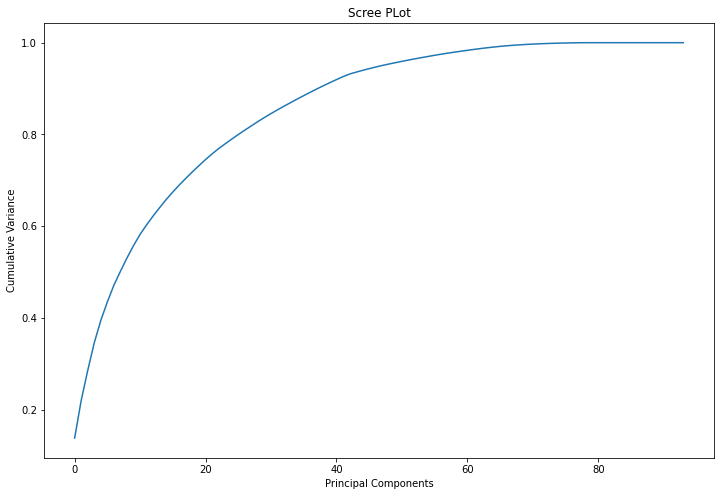

In [118]:
# Scree Plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12,8))
plt.plot(var_cumu)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree PLot')
plt.show()

In [119]:
# Let us see explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      13.83
1      22.01
2      28.55
3      34.60
4      39.47
5      43.50
6      47.15
7      50.18
8      53.09
9      55.78
10     58.22
11     60.31
12     62.24
13     64.08
14     65.84
15     67.45
16     69.00
17     70.46
18     71.86
19     73.20
20     74.53
21     75.76
22     76.91
23     77.96
24     78.98
25     79.98
26     80.94
27     81.87
28     82.80
29     83.70
30     84.54
31     85.37
32     86.16
33     86.94
34     87.71
35     88.46
36     89.20
37     89.91
38     90.62
39     91.29
40     91.95
41     92.59
42     93.16
43     93.58
44     93.97
45     94.34
46     94.70
47     95.04
48     95.34
49     95.64
50     95.93
51     96.21
52     96.49
53     96.75
54     97.00
55     97.25
56     97.49
57     97.72
58     97.93
59     98.14
60     98.34
61     98.53
62     98.72
63     98.89
64     99.05
65     99.19
66     99.32
67     99.44
68     99.54
69     99.62
70     99.69
71     99.76
72     99.81
73     99.86
74     99.90
75     99.93
76     99.96

With PCA we could capture 95% of variance with 47 components. Hence we create 47 principal components

In [120]:
# Fit and Transform X_train for n_components=47
pca_final = IncrementalPCA(n_components=47)

X_train_sm_pca = pca_final.fit_transform(X_train_smote)

In [121]:
X_train_sm_pca.shape

(38430, 47)

In [122]:
y_train_smote.shape

(38430,)

In [123]:
# Hyper parameter tuning for Gradient Boost
param_grid = {
              "learning_rate": [0.1, 0.4, 0.5],
              "max_depth":[5,10]
             }


gbc = GradientBoostingClassifier(random_state=0, verbose=1, n_estimators=50)
gbc_grid_search = GridSearchCV(estimator=gbc, verbose=1, n_jobs=-1, cv=5, scoring='recall', return_train_score=True, param_grid=param_grid)

In [124]:
%%time
gbc_grid_search.fit(X_train_sm_pca, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.4min finished


      Iter       Train Loss   Remaining Time 
         1           0.9244            1.49m
         2           0.6919            1.44m
         3           0.5413            1.45m
         4           0.4390            1.41m
         5           0.3609            1.37m
         6           0.3039            1.37m
         7           0.2624            1.34m
         8           0.2249            1.30m
         9           0.2004            1.28m
        10           0.1781            1.24m
        20           0.0574           55.46s
        30           0.0240           37.07s
        40           0.0107           18.60s
        50           0.0050            0.00s
Wall time: 14min 57s


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=0, verbose=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.4, 0.5],
                         'max_depth': [5, 10]},
             return_train_score=True, scoring='recall', verbose=1)

In [125]:
gbc_best = gbc_grid_search.best_estimator_
gbc_best

GradientBoostingClassifier(learning_rate=0.4, max_depth=10, n_estimators=50,
                           random_state=0, verbose=1)

In [126]:
# Transform test data for pca
X_test_gbm_pca = pca_final.transform(X_test)

In [127]:
# Sensitivity on test data
metrics.recall_score(y_test,gbc_best.predict(X_test_gbm_pca))

0.625

In [128]:
# Further tune the Gradient boost model by increasing the learning rate and decreasing the n_estimators
gbc_2 = GradientBoostingClassifier(learning_rate=0.8, max_depth=3, n_estimators=9,
                           random_state=0, verbose=1)
gbc_2.fit(X_train_sm_pca, y_train_smote)

      Iter       Train Loss   Remaining Time 
         1           1.0561            5.33s
         2           0.9258            4.57s
         3           0.8725            3.94s
         4           0.8336            3.32s
         5           0.8093            2.65s
         6           0.7896            2.05s
         7           0.7744            1.37s
         8           0.7518            0.68s
         9           0.7342            0.00s


GradientBoostingClassifier(learning_rate=0.8, n_estimators=9, random_state=0,
                           verbose=1)

In [129]:
# Sensitivity on test data
metrics.recall_score(y_test,gbc_2.predict(X_test_gbm_pca))

0.8131578947368421

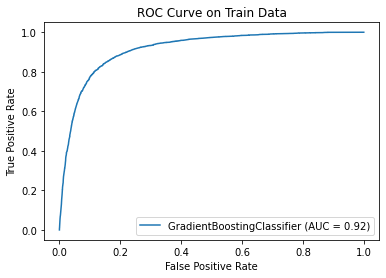

In [130]:
# Plot ROC Curve for the final model on Train Data
metrics.plot_roc_curve(gbc_2,X_train_sm_pca,y_train_smote)
plt.title('ROC Curve on Train Data')
plt.show()

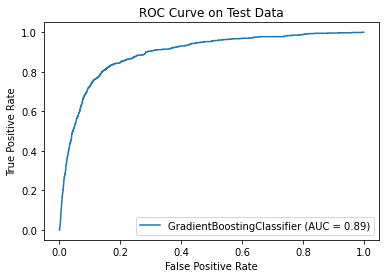

In [131]:
# Plot ROC Curve for the final model on Test Data
metrics.plot_roc_curve(gbc_2,X_test_gbm_pca,y_test)
plt.title('ROC Curve on Test Data')
plt.show()

With GradientBoost we were able to achieve:
- Sensitivity on test data: ~81%
- Area Under Curve - 0.92 for Train and 0.89 for Test

## Interpretable Model - Logistic Regression Without PCA

In [132]:
X_train_logreg = X_smote.copy()
y_train_logreg = y_smote.copy()

In [133]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg)

params = {
#     'estimator__C':[0.2, 0.5, 0.8],
    'n_features_to_select':[15,20,25]
}


lr_grid_search = GridSearchCV(estimator=rfe, cv=5, param_grid=params,scoring='recall', n_jobs=-1, verbose=1)

In [134]:
%%time
lr_grid_search.fit(X_train_logreg,y_train_logreg)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 13.7min finished


Wall time: 15min 10s


GridSearchCV(cv=5, estimator=RFE(estimator=LogisticRegression(max_iter=1000)),
             n_jobs=-1, param_grid={'n_features_to_select': [15, 20, 25]},
             scoring='recall', verbose=1)

In [135]:
lr_best = lr_grid_search.best_estimator_
lr_best

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=25)

In [136]:
lr_grid_search.best_score_

0.8602133749674733

In [137]:
# Accuracy and Sensitivity on train data
y_train_pred = lr_best.predict(X_train_smote)
print('Accuracy on Train Data')
print(metrics.accuracy_score(y_train_smote, y_train_pred))
print('Sensitivity on Train Data')
print(metrics.recall_score(y_train_smote, y_train_pred))

Accuracy on Train Data
0.8381212594327349
Sensitivity on Train Data
0.8614623991673171


In [138]:
# Accuracy and Sensitivity on test data
y_test_pred = lr_best.predict(X_test)
print('Accuracy on Test Data')
print(metrics.accuracy_score(y_test, y_test_pred))
print('Sensitivity on Test Data')
print(metrics.recall_score(y_test, y_test_pred))

Accuracy on Test Data
0.8199689027099067
Sensitivity on Test Data
0.8486842105263158


In [139]:
# Parameters of the best model
lr_best

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=25)

In [140]:
# Fine tuning the model
rfe_2 = RFE(estimator=LogisticRegression(), n_features_to_select=22)

In [141]:
%%time
rfe_2.fit(X_train_smote,y_train_smote)

Wall time: 44.6 s


RFE(estimator=LogisticRegression(), n_features_to_select=22)

In [142]:
# Sensitivity on Test Data
print('Sensitivity on Test Data {0}'.format(metrics.recall_score(y_test, rfe_2.predict(X_test))))

Sensitivity on Test Data 0.8552631578947368


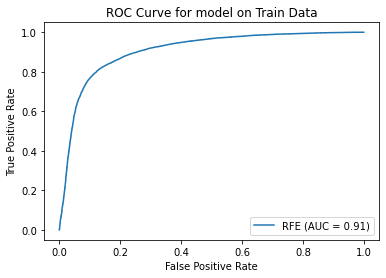

In [143]:
# PLot the ROC
metrics.plot_roc_curve(rfe_2, X_train_smote, y_train_smote)
plt.title('ROC Curve for model on Train Data')
plt.show()

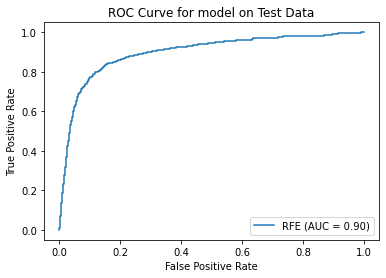

In [144]:
# PLot the ROC
metrics.plot_roc_curve(rfe_2, X_test, y_test)
plt.title('ROC Curve for model on Test Data')
plt.show()

In [145]:
rfe_2.estimator_.coef_

array([[ 0.42570837,  0.37930633, -1.97359282, -0.79177419, -0.33097699,
        -0.96284073, -0.44452501, -0.91265165, -1.12935127, -0.39593473,
         0.45553674, -0.67125282, -0.35371054, -0.32031347, -0.37802439,
        -0.37852903,  0.43380287,  0.37161205,  0.68223621,  0.32781644,
        -0.30775873,  0.36017954]])

In [146]:
features_in_model = X_train_smote.columns[rfe_2.support_]
features_in_model

Index(['offnet_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'fb_user_8', 'aon', 'arpu_good', 'loc_og_t2t_mou_good',
       'loc_ic_t2m_mou_good', 'std_ic_t2t_mou_good', 'av_rech_amt_data_good',
       'arpu_2g_good'],
      dtype='object')

In [147]:
feature_importance_df = pd.DataFrame(data=rfe_2.estimator_.coef_, columns=features_in_model)
feature_importance_df = feature_importance_df.T
feature_importance_df.columns = ['Importance']

In [148]:
feature_importance_df.sort_values(by='Importance', ascending=False)

,Importance
loc_ic_t2m_mou_good,0.682236
date_of_last_rech_8,0.455537
arpu_good,0.433803
offnet_mou_8,0.425708
loc_og_t2m_mou_8,0.379306
loc_og_t2t_mou_good,0.371612
arpu_2g_good,0.360180
std_ic_t2t_mou_good,0.327816
av_rech_amt_data_good,-0.307759
monthly_3g_8,-0.320313


### Final Interpretable Model

- Overall Accuracy is around 84% at Train set Vs 82% at Test Set
- Sensitivity is 86% at Train Set Vs 86% at Test Set
- ROC is 0.91 for Train Set and 0.90 Test Set

## Strategies to Manage Customer Churn

- Top 4 Features affecting Churn in positive way are  loc_ic_t2m_mou_good, date_of_last_rech_8, arpu_good, offnet_mou_8
- Top 4 Features affecting Churn in negative way are loc_og_mou_8, std_ic_t2t_mou_8, loc_ic_t2m_mou_8, loc_ic_mou_8

1. Hence the company needs to focus on minutes of local incoming calls from other operator mobile, avg revenue per user, all kinds of calls outside operator netwrork.
2. May be the company should reduce costs for calls to other operators, increase the revenue by providing some personlized plans, follow up with customer for timely recharges and motivate them to recharge
3. Some of the good things the company is doing is minutes of usage for local outgoing, std incoming from same operator, local imcoming from same operator. These should be maintained in same way.